In [7]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from sklearn.metrics.pairwise import pairwise_distances

# Load the Olivetti faces dataset
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# The dataset is stored in the 'data' attribute, and the corresponding labels are in the 'target' attribute.
X_faces = olivetti_faces.data
y_faces = olivetti_faces.target

# 'X' contains the face images, and 'y' contains the corresponding labels (subject IDs).
# Each row of 'X' is a flattened image of size 64x64 pixels (4096 pixels in total).
# 'y' contains labels ranging from 0 to 39, representing the identity of the person in the image.

# You can also access other information about the dataset, such as the DESCR attribute for a description.
print(olivetti_faces.DESCR)


.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_faces, y_faces, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Now, you have the following splits:
# X_train and y_train: Training set with 60% of the data
# X_val and y_val: Validation set with 20% of the data
# X_test and y_test: Test set with 20% of the data

# You can verify the distribution of classes in each set to ensure stratified sampling.
from collections import Counter

print("Training set class distribution:", Counter(y_train))
print("Validation set class distribution:", Counter(y_val))
print("Test set class distribution:", Counter(y_test))


Training set class distribution: Counter({4: 6, 2: 6, 24: 6, 17: 6, 29: 6, 13: 6, 32: 6, 33: 6, 39: 6, 23: 6, 7: 6, 11: 6, 14: 6, 6: 6, 9: 6, 20: 6, 12: 6, 37: 6, 35: 6, 25: 6, 1: 6, 36: 6, 3: 6, 16: 6, 26: 6, 30: 6, 5: 6, 22: 6, 28: 6, 0: 6, 27: 6, 38: 6, 31: 6, 18: 6, 34: 6, 19: 6, 21: 6, 15: 6, 10: 6, 8: 6})
Validation set class distribution: Counter({34: 2, 25: 2, 10: 2, 31: 2, 37: 2, 7: 2, 24: 2, 8: 2, 15: 2, 30: 2, 9: 2, 20: 2, 28: 2, 18: 2, 33: 2, 2: 2, 12: 2, 4: 2, 0: 2, 27: 2, 32: 2, 14: 2, 21: 2, 22: 2, 1: 2, 17: 2, 6: 2, 39: 2, 38: 2, 19: 2, 35: 2, 26: 2, 23: 2, 29: 2, 13: 2, 36: 2, 11: 2, 16: 2, 5: 2, 3: 2})
Test set class distribution: Counter({15: 2, 17: 2, 19: 2, 24: 2, 31: 2, 21: 2, 6: 2, 4: 2, 26: 2, 12: 2, 7: 2, 35: 2, 8: 2, 3: 2, 39: 2, 37: 2, 10: 2, 22: 2, 30: 2, 9: 2, 34: 2, 14: 2, 23: 2, 18: 2, 20: 2, 16: 2, 2: 2, 38: 2, 27: 2, 5: 2, 1: 2, 0: 2, 33: 2, 28: 2, 11: 2, 13: 2, 29: 2, 32: 2, 36: 2, 25: 2})


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC  # Example classifier (you can choose a different one)
classifier = SVC(kernel='linear', C=1)
k_folds = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X_train, y_train, cv=kf)
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')


Mean Accuracy: 0.90
Standard Deviation: 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

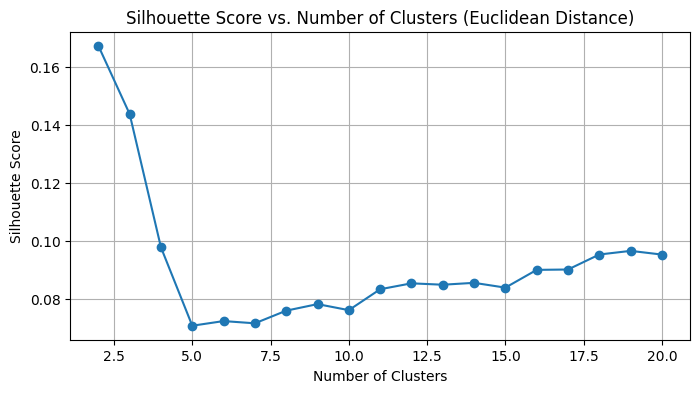

In [11]:
#Eucledian

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from sklearn.metrics.pairwise import pairwise_distances


# Initialize a list to store silhouette scores for different numbers of clusters
silhouette_scores_euclidean = []

# Choose a range of cluster numbers to test
cluster_range = range(2, 21)

for n_clusters in cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
    agg_labels = agg_clustering.fit_predict(pairwise_distances(X_faces, metric='euclidean'))
    silhouette_scores_euclidean.append(silhouette_score(X_faces, agg_labels))

# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores_euclidean, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Euclidean Distance)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

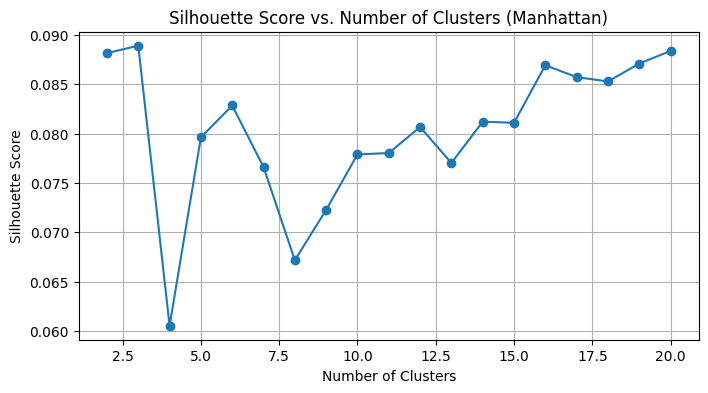

In [15]:
#manhattan


from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from sklearn.metrics.pairwise import pairwise_distances


# Initialize a list to store silhouette scores for different numbers of clusters
silhouette_scores_manhattan = []

# Choose a range of cluster numbers to test
cluster_range = range(2, 21)

for n_clusters in cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
    agg_labels = agg_clustering.fit_predict(pairwise_distances(X_faces, metric='manhattan'))
    silhouette_scores_manhattan.append(silhouette_score(X_faces, agg_labels))

# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores_manhattan, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Manhattan)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

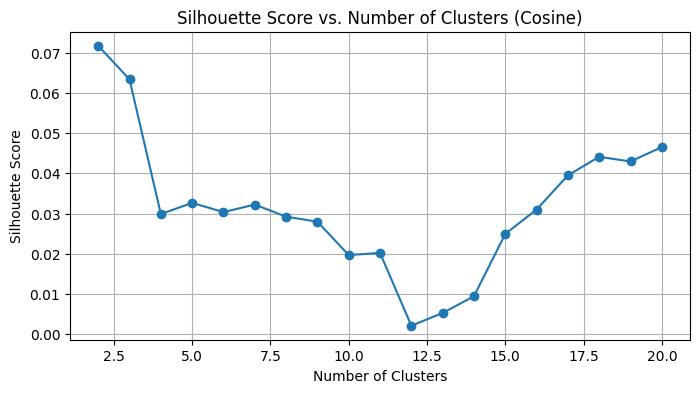

In [16]:
#cosine


from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from sklearn.metrics.pairwise import pairwise_distances


# Initialize a list to store silhouette scores for different numbers of clusters
silhouette_scores_cosine = []

# Choose a range of cluster numbers to test
cluster_range = range(2, 21)

for n_clusters in cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
    agg_labels = agg_clustering.fit_predict(pairwise_distances(X_faces, metric='cosine'))
    silhouette_scores_cosine.append(silhouette_score(X_faces, agg_labels))

# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores_cosine, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Cosine)')
plt.grid(True)
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # You can choose any classifier

# Function to perform clustering and dimensionality reduction
def perform_clustering(X, affinity, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage='complete')
    return clustering.fit_predict(X)

# Define the number of clusters determined from step 4 for each similarity measure
num_clusters_euclidean = 5 # Adjust as per your silhouette score result
num_clusters_manhattan = 4  # Adjust as per your silhouette score result
num_clusters_cosine = 12  # Adjust as per your silhouette score result

# Perform clustering and dimensionality reduction with different similarity measures
clusters_euclidean = perform_clustering(X_faces, 'euclidean', num_clusters_euclidean)
clusters_manhattan = perform_clustering(X_faces, 'manhattan', num_clusters_manhattan)
clusters_cosine = perform_clustering(X_faces, 'cosine', num_clusters_cosine)

# Define a classifier (e.g., Random Forest)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can choose any classifier

# Evaluate the classifier using k-fold cross-validation on each reduced dataset
k = 5  # Number of folds for cross-validation
scores_euclidean = cross_val_score(classifier, clusters_euclidean.reshape(-1, 1), y_faces, cv=k)
scores_manhattan = cross_val_score(classifier, clusters_manhattan.reshape(-1, 1), y_faces, cv=k)
scores_cosine = cross_val_score(classifier, clusters_cosine.reshape(-1, 1), y_faces, cv=k)

# Print the mean accuracy for each similarity measure
print(f"Mean Accuracy (Euclidean Distance): {scores_euclidean.mean():.2f}")
print(f"Mean Accuracy (Manhattan Distance): {scores_manhattan.mean():.2f}")
print(f"Mean Accuracy (Cosine Similarity): {scores_cosine.mean():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Mean Accuracy (Euclidean Distance): 0.08
Mean Accuracy (Manhattan Distance): 0.08
Mean Accuracy (Cosine Similarity): 0.18
